<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Séries Temporais - Prática 4

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>

MBA em Ciência de Dados<br>
Universidade de Fortaleza

# **1. Dataset ''Electric_Production.csv'**

## A partir de um DataFrame, utilize os modelos abaixo para fazer previsões para os 30 períodos futuros.

1. ARIMA (2,0,0)

2. ARIMA (2,0,1)
    
3. ARIMA (2,2,1)
    
4. ARIMA (8,2,1)
    
5. Crie um gráfico com todas as previsões acima.
    
6. Entre estes, qual é o melhor? Utilize a métrica AIC.  
    
7. Use o auto-arima e apresente o melhor modelo encontrado.

### Observações:
- Para cada item, crie novas células para efetuar seus códigos.
- Nomear variáveis de acordo com o contexto da questão.
- Caso necessário, utilize novas caixas de textos para deixar comentários.

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
!gdown 1_0buQPyM_CznA5H5qNMzmizP07jVS2r1

Downloading...
From: https://drive.google.com/uc?id=1_0buQPyM_CznA5H5qNMzmizP07jVS2r1
To: /content/Electric_Production.csv
100% 7.32k/7.32k [00:00<00:00, 17.6MB/s]


In [10]:
df = pd.read_csv('Electric_Production.csv')

In [11]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [7]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


##Ánalise da série

In [12]:
df['DATE'] = pd.to_datetime(df['DATE'])
df1 = df.rename(columns={'IPG2211A2N': 'PRODUCAO'})

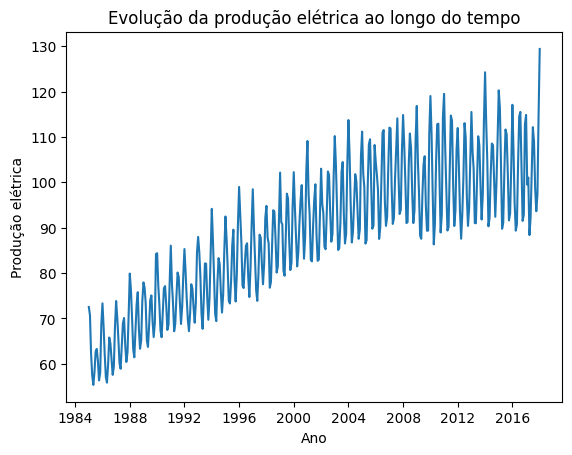

In [13]:
# Plotar Série temporal de análise

plt.plot(df1['DATE'], df1['PRODUCAO'])
plt.title('Evolução da produção elétrica ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('Produção elétrica')
plt.show()

## Médias Móveis

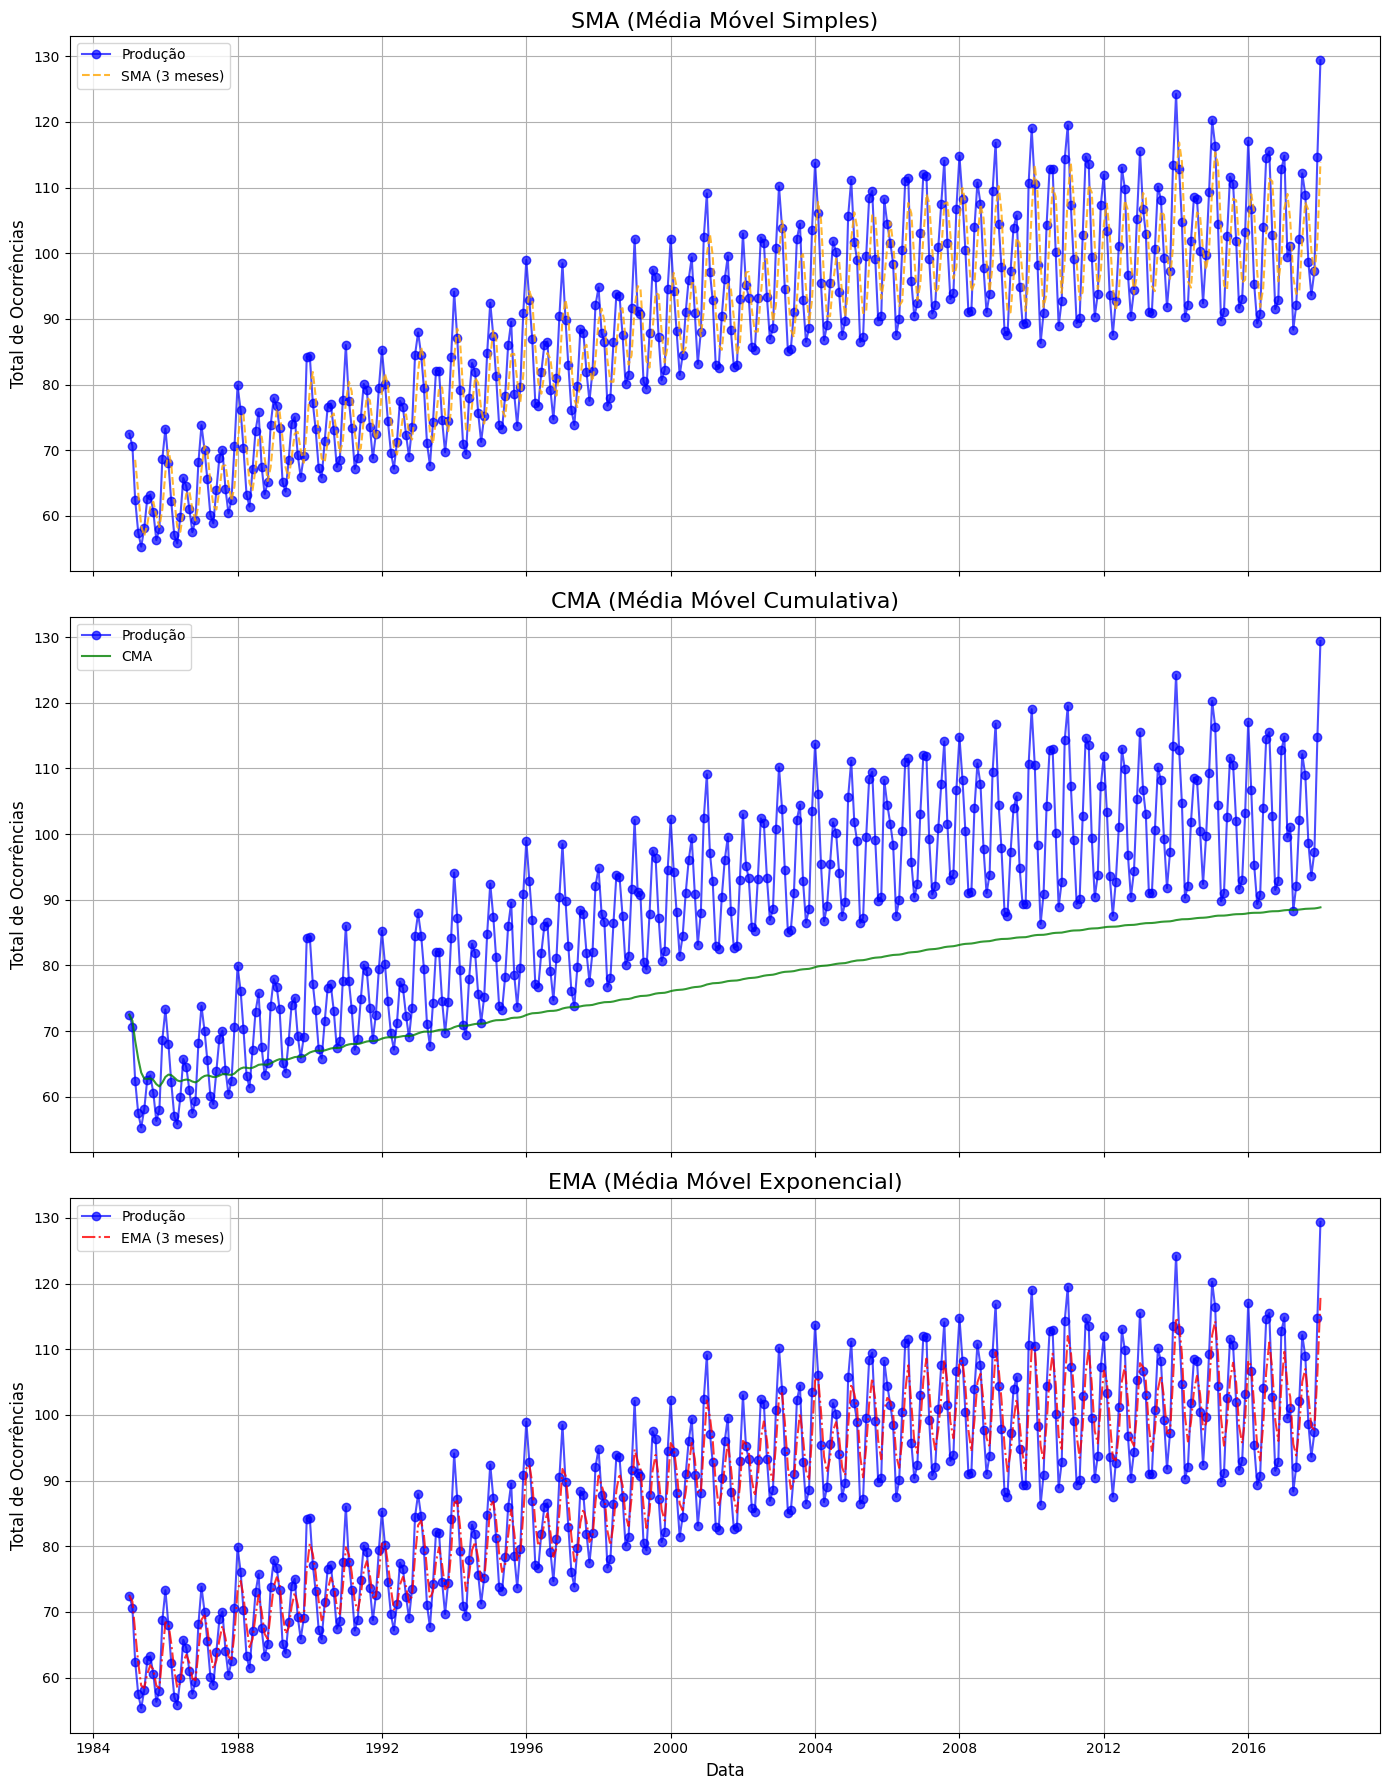

In [14]:
# Plotar médias móveis

# Calcular as médias móveis sobre os dados agregados
df1['SMA'] = df1['PRODUCAO'].rolling(window=3).mean()
df1['CMA'] = df1['PRODUCAO'].expanding().mean()
df1['EMA'] = df1['PRODUCAO'].ewm(span=3, adjust=False).mean()

# Configurar subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Plotar SMA
axes[0].plot(df1['DATE'], df1['PRODUCAO'], label='Produção', marker='o', linestyle='-', alpha=0.7, color='blue')
axes[0].plot(df1['DATE'], df1['SMA'], label='SMA (3 meses)', linestyle='--', color='orange', alpha=0.8)
axes[0].set_title('SMA (Média Móvel Simples)', fontsize=16)
axes[0].set_ylabel('Total de Ocorrências', fontsize=12)
axes[0].legend()
axes[0].grid(True)

# Plotar CMA
axes[1].plot(df1['DATE'], df1['PRODUCAO'], label='Produção', marker='o', linestyle='-', alpha=0.7, color='blue')
axes[1].plot(df1['DATE'], df1['CMA'], label='CMA', linestyle='-', color='green', alpha=0.8)
axes[1].set_title('CMA (Média Móvel Cumulativa)', fontsize=16)
axes[1].set_ylabel('Total de Ocorrências', fontsize=12)
axes[1].legend()
axes[1].grid(True)

# Plotar EMA
axes[2].plot(df1['DATE'], df1['PRODUCAO'], label='Produção', marker='o', linestyle='-', alpha=0.7, color='blue')
axes[2].plot(df1['DATE'], df1['EMA'], label='EMA (3 meses)', linestyle='-.', color='red', alpha=0.8)
axes[2].set_title('EMA (Média Móvel Exponencial)', fontsize=16)
axes[2].set_xlabel('Data', fontsize=12)
axes[2].set_ylabel('Total de Ocorrências', fontsize=12)
axes[2].legend()
axes[2].grid(True)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


## Funções de teste

In [28]:
import scipy.stats as stats
import statsmodels.tsa.stattools

In [30]:
# Estacionaridade

def teste_estacionaridade(x):
    kpss = statsmodels.tsa.stattools.kpss(x)
    valor_critico = kpss[3]['5%']
    teste = kpss[0]
    if teste <= valor_critico:
        print('A série é estacionária')
    else:
        print('A série NÃO é estacionária')

In [31]:
def teste_normalidade(x):
    e, p = stats.shapiro(x)
    if p < 0.05:
        print('A distribuição NÃO é normal')
    else:
        print('A distribuição é normal')

In [32]:
teste_estacionaridade(df1['PRODUCAO'])
teste_normalidade(df1['PRODUCAO'])

A série NÃO é estacionária
A distribuição NÃO é normal


<ipython-input-30-402f918f2505>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(x)


## Transformação

In [34]:
# Transformação cúbica

serie_cubica = df1['PRODUCAO']**(1/3)
serie_cubica

,PRODUCAO
0,4.169875
1,4.134431
2,3.967448
3,3.859081
4,3.810201
...,...
392,4.620067
393,4.540599
394,4.599998
395,4.859011


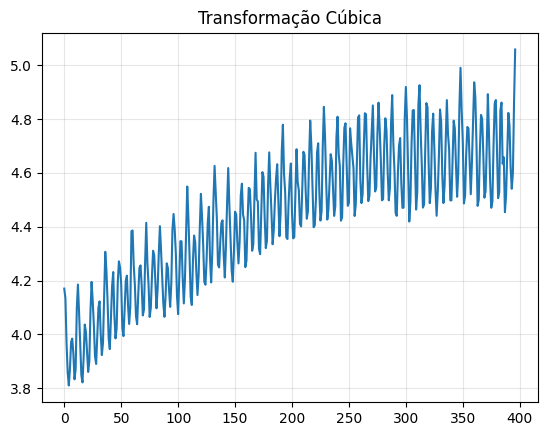

In [35]:
# Plot série Cúbica

plt.figure()
plt.title('Transformação Cúbica')
plt.plot(serie_cubica)
plt.grid(alpha=0.3)

In [36]:
# Teste série cúbica
teste_estacionaridade(serie_cubica)
teste_normalidade(serie_cubica)

A série NÃO é estacionária
A distribuição NÃO é normal


<ipython-input-30-402f918f2505>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(x)


In [37]:
# Logartimica
serie_log = np.log(df1['PRODUCAO'])
serie_log

,PRODUCAO
0,4.283658
1,4.258049
2,4.134369
3,4.051287
4,4.013046
...,...
392,4.591227
393,4.539177
394,4.578168
395,4.742505


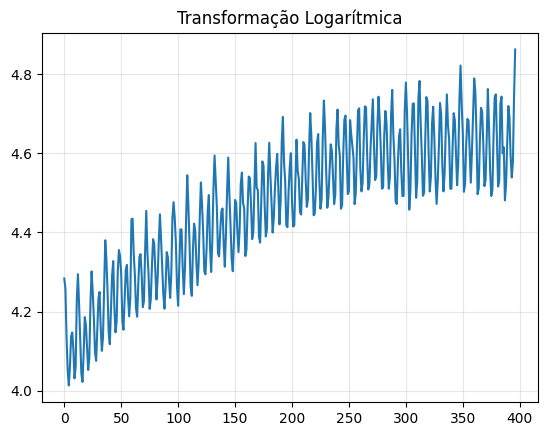

In [38]:
# plot logatitmica

plt.figure()
plt.title('Transformação Logarítmica')
plt.plot(serie_log)
plt.grid(alpha=0.3)

In [39]:
# Teste
teste_estacionaridade(serie_log)
teste_normalidade(serie_log)

A série NÃO é estacionária
A distribuição NÃO é normal


<ipython-input-30-402f918f2505>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(x)


## Treinamento de Modelos

## ARIMA (2,0,0) - Auto Regressivo

In [62]:
print("\n### Modelo AR ###")
AR = sm.tsa.arima.ARIMA(serie_cubica.values, order=(2, 0, 0))
resultado_AR = AR.fit()
print(resultado_AR.summary())


### Modelo AR ###
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  397
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 317.150
Date:                Sat, 14 Dec 2024   AIC                           -626.299
Time:                        14:05:01   BIC                           -610.364
Sample:                             0   HQIC                          -619.987
                                - 397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4503      0.034    131.460      0.000       4.384       4.517
ar.L1          1.3014      0.054     24.068      0.000       1.195       1.407
ar.L2         -0.4679      0.056 

MÉTRICA DE AIC: -626.299


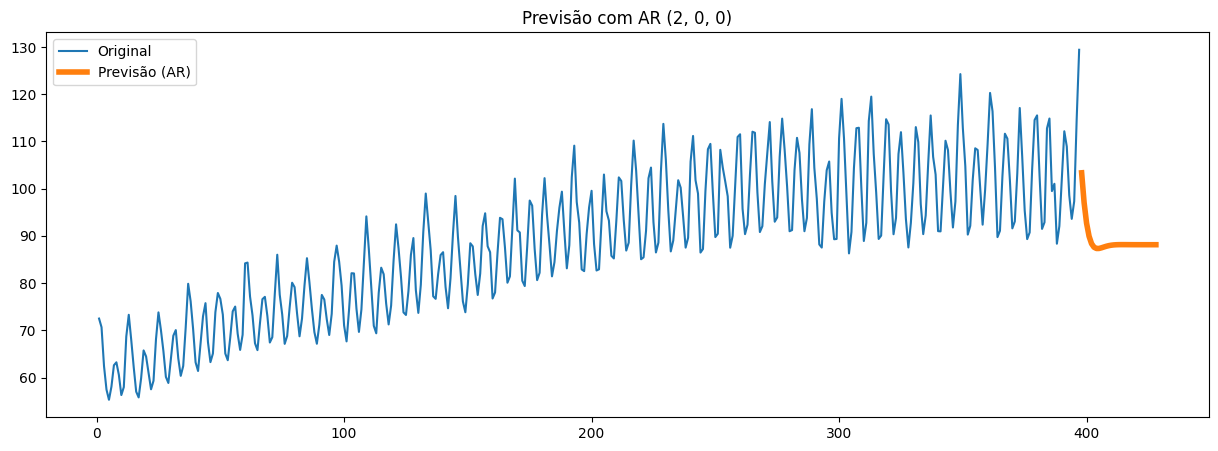

In [63]:
previsao = resultado_AR.predict(start=400, end=430)
serprev = list(previsao ** 3)

plt.figure(figsize=(15, 5))
plt.plot(range(1, len(df1['PRODUCAO'])+1), df1['PRODUCAO'], label='Original')
plt.plot(range(len(df1['PRODUCAO'])+1, len(df1['PRODUCAO'])+len(serprev)+1), serprev, label='Previsão (AR)', lw=4)
plt.legend()
plt.title('Previsão com AR (2, 0, 0)')
plt.show()

### ARIMA (2,0,1) - Auto Regressivo + Média Movel

In [64]:
print("\n### Modelo MA ###")
MA = sm.tsa.arima.ARIMA(serie_cubica.values, order=(2, 0, 1))
resultado_MA = MA.fit()
print(resultado_MA.summary())


### Modelo MA ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  397
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 350.653
Date:                Sat, 14 Dec 2024   AIC                           -691.306
Time:                        14:05:40   BIC                           -671.387
Sample:                             0   HQIC                          -683.415
                                - 397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4497      0.036    124.169      0.000       4.380       4.520
ar.L1          1.0293      0.083     12.358      0.000       0.866       1.193
ar.L2         -0.2404      0.083     -2.906      0.0

MÉTRICA DE AIC: -691.306

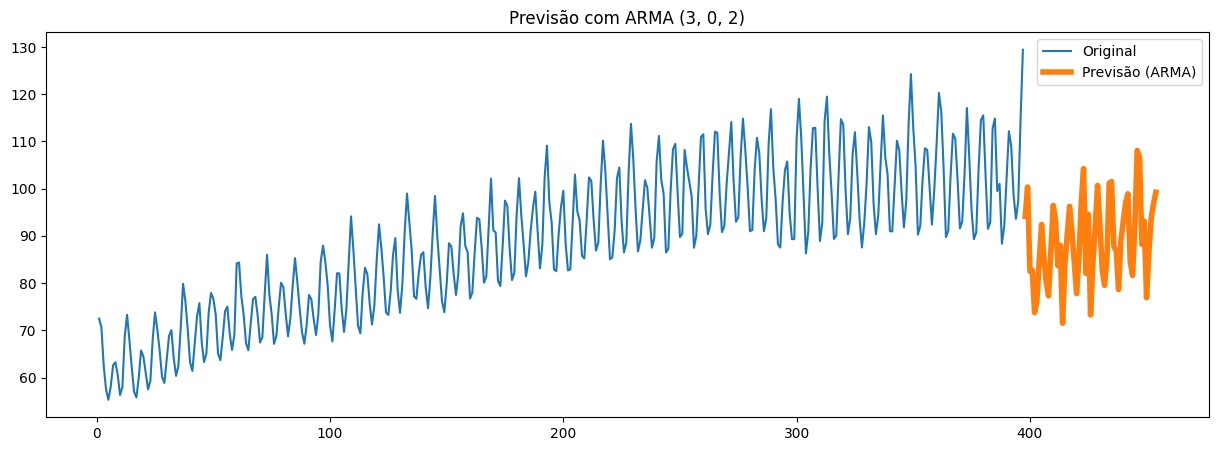

In [65]:
previsao = resultado_MA.predict(start=144, end=200)
serprev = list(previsao ** 3)

plt.figure(figsize=(15, 5))
plt.plot(range(1, len(df1['PRODUCAO'])+1), df1['PRODUCAO'], label='Original')
plt.plot(range(len(df1['PRODUCAO'])+1, len(df1['PRODUCAO'])+len(serprev)+1), serprev, label='Previsão (ARMA)', lw=4)
plt.legend()
plt.title('Previsão com ARMA (3, 0, 2)')
plt.show()

### ARIMA (2,2,1) - Autorregressivo + Diferenciação + Média Móvel

In [57]:
print("\n### Modelo ARIMA ###")
ARIMA = sm.tsa.arima.ARIMA(serie_cubica.values, order=(2, 2, 1))
ARIMA = ARIMA.fit()
print(ARIMA.summary())


### Modelo ARIMA ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  397
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 406.592
Date:                Sat, 14 Dec 2024   AIC                           -805.185
Time:                        14:01:56   BIC                           -789.269
Sample:                             0   HQIC                          -798.879
                                - 397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6395      0.038     16.719      0.000       0.564       0.714
ar.L2         -0.6802      0.040    -17.078      0.000      -0.758      -0.602
ma.L1         -1.0000     15.301     -0.065      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MÉTRICA DE AIC: -805.185

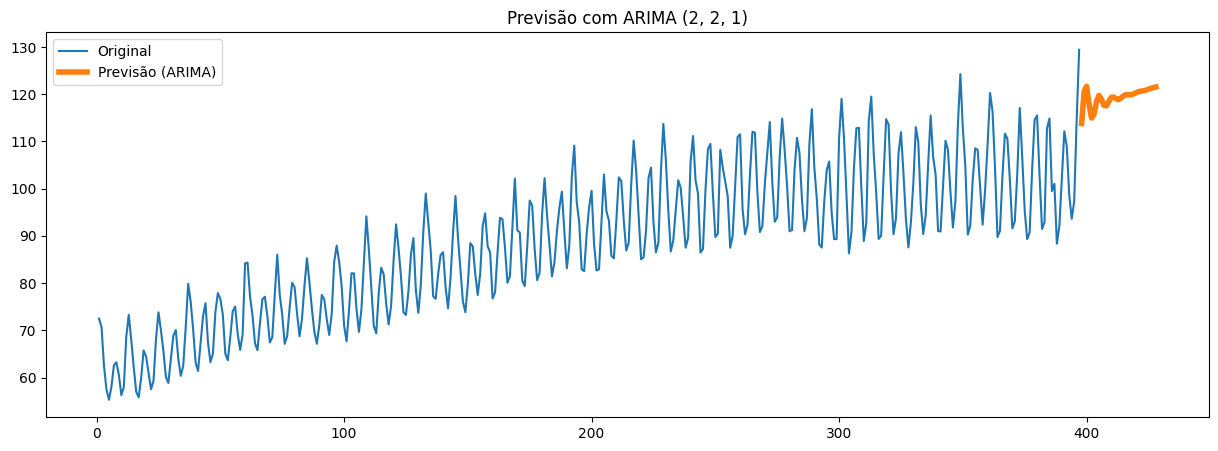

In [66]:
previsao = ARIMA.predict(start=400, end=430)
serprev = list(previsao ** 3)

plt.figure(figsize=(15, 5))
plt.plot(range(1, len(df1['PRODUCAO'])+1), df1['PRODUCAO'], label='Original')
plt.plot(range(len(df1['PRODUCAO'])+1, len(df1['PRODUCAO'])+len(serprev)+1), serprev, label='Previsão (ARIMA)', lw=4)
plt.legend()
plt.title('Previsão com ARIMA (2, 2, 1)')
plt.show()

### ARIMA (8,2,1) - Autorregressivo + Diferenciação + Média Móvel


In [67]:
print("\n### Modelo ARIMA ###")
ARIMA = sm.tsa.arima.ARIMA(serie_cubica.values, order=(8, 2, 1))
ARIMA = ARIMA.fit()
print(ARIMA.summary())


### Modelo ARIMA ###


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  397
Model:                 ARIMA(8, 2, 1)   Log Likelihood                 536.789
Date:                Sat, 14 Dec 2024   AIC                          -1053.577
Time:                        14:10:12   BIC                          -1013.788
Sample:                             0   HQIC                         -1037.813
                                - 397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0218      0.047      0.468      0.640      -0.070       0.113
ar.L2         -0.4160      0.053     -7.889      0.000      -0.519      -0.313
ar.L3         -0.4283      0.065     -6.546      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MÉTRICA DE AIC: -1053.577

**CONCLUSÃO: Entre os modelos testados de Auto Regressivo, Auto Regressivo + Média Móvel e o ARIMA. o Melhor foi o ARIMA (8,2,1) tendo a melhor métrica AIC de: -1053.577**

### AUTOARIMA

In [68]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.3 MB/s eta 0:00:00


In [70]:
from pmdarima.arima import auto_arima

In [71]:
print("\n### Modelo AUTO-ARIMA ###")
modelo_auto = auto_arima(
    serie_cubica,
    trace=True,          # Exibe o progresso e combinações de parâmetros testados
    stepwise=True,       # Utiliza busca stepwise para acelerar o processo de ajuste
    seasonal=True,       # Considera sazonalidade no modelo (ativa P, D, Q, m)
    max_p=12,            # Máximo número de lags autorregressivos (p)
    max_q=2,             # Máximo número de lags para média móvel (q)
    max_P=12,            # Máximo número de componentes sazonais autorregressivos (P)
    max_Q=1,             # Máximo número de componentes sazonais de média móvel (Q)
    start_p=0,           # Valor inicial para p
    start_q=0,           # Valor inicial para q
    start_P=0,           # Valor inicial para P
    start_Q=0,           # Valor inicial para Q
    m=12                 # Sazonalidade mensal (período da série, ex.: 12 meses)
)


### Modelo AUTO-ARIMA ###
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-512.592, Time=0.20 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-870.706, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-514.467, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-645.746, Time=0.22 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-1371.155, Time=2.46 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-1236.238, Time=1.06 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-1356.100, Time=8.18 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-1282.370, Time=4.07 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-1352.104, Time=1.73 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-1415.277, Time=3.11 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-869.252, Time=5.06 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-1295.445, Time=7.40 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=-1379.550, Tim

In [72]:
print("AIC do modelo AUTO-ARIMA:", modelo_auto.aic())

AIC do modelo AUTO-ARIMA: -1430.328937837944


In [73]:
previsao_auto = modelo_auto.predict(n_periods=30)  # Prever 30 períodos futuros
previsao_auto_cubica = previsao_auto ** 3  # Revertendo a transformação cúbica

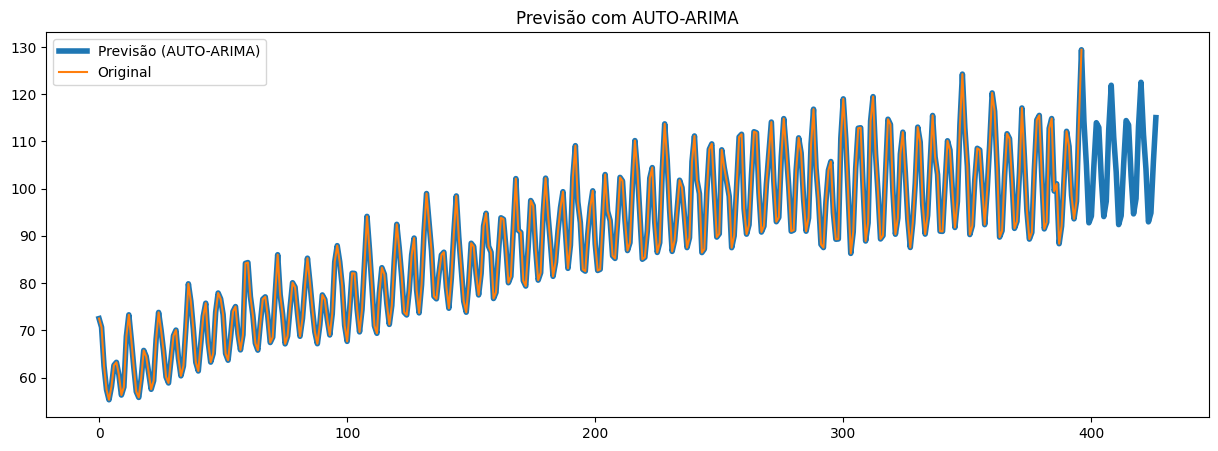

In [75]:
# plot com dados originais e de treino

serprev = list(df1['PRODUCAO'].values) + list(previsao_auto_cubica)
previsao = pd.Series(data=serprev, index=pd.date_range(start='1949-01-01', freq='ME', periods=len(serprev)))

plt.figure(figsize=(15, 5))
plt.plot(range(len(previsao)), previsao, label='Previsão (AUTO-ARIMA)', lw=4)
plt.plot(range(len(df1['PRODUCAO'])), df1['PRODUCAO'], label='Original')
plt.legend()
plt.title('Previsão com AUTO-ARIMA')
plt.show()

**CONCLUSÃO ARIMA**: Melhor modelo encontrado: **ARIMA(1,1,1)(1,0,1)[12]**. Com Métrica de **AIC = -1430.328**